In [42]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast


dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [43]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

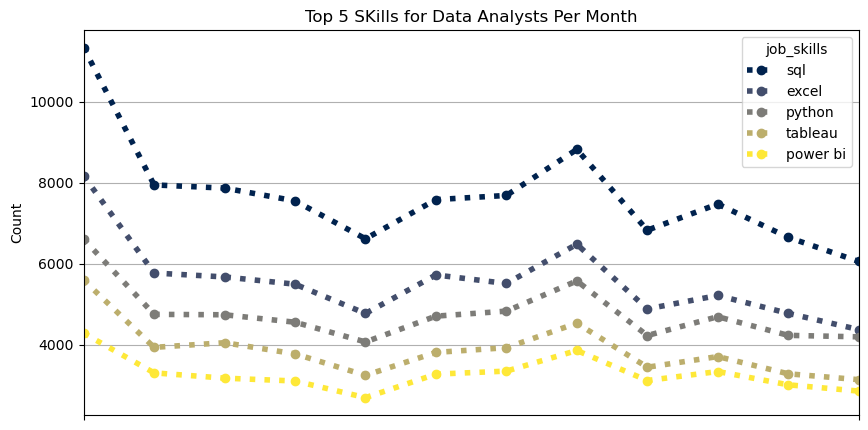

In [44]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':',
    colormap='cividis',
    marker='o',
    markersize=6,
    figsize=(10,5),
    grid=True
)

plt.title('Top 5 SKills for Data Analysts Per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()